<h1> Problem 1 </h1>

<img src="https://imgur.com/KQqS2Bm.png">

**Data**

i = 1,...,8 = inventory piles

k = 1,...,25 = customers

b<sub>i</sub> = Per ton BPL level of pile i

a<sub>i</sub> = Per ton asset value of pile i

r<sub>i,k</sub> = Contract net profit of shipping one ton of pile i to customer k

h<sub>i</sub> = Starting inventory (tons) of pile i

q<sub>i</sub> = Amount (tons) of inventory collected by mines to pile i

$\underline s_k$ = minimum tons sent to customer k

$\overline s_k$ = maximum tons sent to customer k

$\underline p_k$ = minimum per ton BPL level sent to customer k

$\overline p_k$ = maximum per ton BPL level sent to customer k

**Decision Variables**

x<sub>i,k</sub> = Quantity (tons) shipped from pile i to customer k

**Objective Function**

__min__ $\sum_{k=1}^{25}\sum_{i=1}^{8} (r_{i,k} * x_{i,k}) + \sum_{i=1}^{8} (a_i * (h_i + q_i - \sum_{k=1}^{25}x_{i,k}))$

_ (profit) + (asset value)_

**Constraints**

Conserve inventory: $\sum_{k=1}^{25} x_{i,k} \leq h_i + q_i \forall  i \in {1,...,8}$

_-->total amount sent to customers from a pile <= pile initial inventory + inventory collected from mine_

Contract volume max: $\sum_{i=1}^{8} x_{i,k} \leq \overline s_k \forall  k \in {1,...,25}$

Contract volume min: $\sum_{i=1}^{8} x_{i,k} \geq \underline s_k \forall  k \in {1,...,25}$

Contract BPL level max: $\sum_{i=1}^{8} (b_i * x_{i,k}) \leq (\overline p_k * \sum_{i=1}^{8} x_{i,k}) \forall k \in {1,...,25}$

_-->BPL/ton in pile X total tons going to customer k <= max acceptable BPL/ton X total tons going to customer k_

Contract BPL level max: $\sum_{i=1}^{8} (b_i * x_{i,k}) \geq (\underline p_k * \sum_{i=1}^{8} x_{i,k}) \forall k \in {1,...,25}$

_-->BPL/ton in pile X total tons going to customer k >= min acceptable BPL/ton X total tons going to customer k_

$x_{i,k} \geq 0 \forall k \in {1,...,25}, i \in {1,...,8}$

<h1> Problem 2 </h1>

<img src="https://imgur.com/aQynDc1.png">

<h2>General Solution (a)</h2>

**Data**

r<sub>i</sub> = Required number of hearts of size i

f<sub>i,j</sub> = Probability of heart size i being produced by supplier j

c<sub>j</sub> = Cost of a heart from supplier j

a<sub>j</sub> = Availability of hearts from supplier j

**Decision Variables**

x<sub>i,j</sub> = Quantity of heart i sourced from supplier j

**Objective Function**

__min__ $\sum_{j=1}^{5} c_j * (\sum_{i=1}^{7} x_{i,j})$

_(cost hearts from a supplier) * (total amount of hearts sent from a supplier)_

**Constraints**

Meet required demand: $\sum_{i=1}^{7} x_{i,j} \geq r_i \forall i \in \{1,...,7\} \forall j \in \{1,...,5\} $

_-->total number of hearts of a given size >= required number of hearts of a given size_

Probability of hearts met: $x_{i,j} \leq a_j*(\sum_{i=1}^{7} f_{i,j}) \forall i \in \{1,...,7\ \forall j \in \{1,...,5\}$

_-->total hearts of size i bought from supplier j <= total hearts available * probability of heart size is i _

$x_{i,j} \geq 0 \forall i \in \{1,...,7\} \forall j \in \{1,...,5\}$

<h2>Solution with Integer (b)</h2>

In [48]:
from gurobipy import *
import numpy as np
import pandas as pd

#add data
r = [20, 30, 120, 200, 150, 60, 45] #required hearts
f = [[0.4,0.4,0.2, 0, 0, 0, 0], #probability of heart sizes
    [0.1, 0.2, 0.3, 0.2, 0.2, 0, 0],
    [0, 0, 0.4, 0.3, 0.3, 0, 0],
    [0, 0, 0.2, 0.2, 0.2, 0.2, 0.2],
    [0, 0, 0, 0, 0.2, 0.3, 0.5]]
c = [2.5,3.2,3.0,2.1,3.9] #cost from supplier j
a = [500,330,150,650,300] #availability of hearts from supplier j

#create model
m = Model("HW2PR2")

#create decision variables
x = m.addVars(7,5,vtype= GRB.CONTINUOUS)

#add constraints

#meet req demand
m.addConstrs((quicksum(x[i,j] for j in range(5)) >= r[i] for i in range(7))) 
#add availability constraint
m.addConstrs(x[i,j] <= f[j][i]*a[j] for i in range(7) for j in range(5))
#greater than 0 constraint
m.addConstrs(x[i,j] >= 0 for i in range(7) for j in range(5))

#set objective function
cost = quicksum(np.transpose(c)[j]*x[i,j] for j in range(5) for i in range(7))
m.setObjective(cost, GRB.MINIMIZE)

#run model
m.optimize()

df = pd.DataFrame(columns=['Size','Supplier','Amount Ordered'])

for i in range(1,7):
    for j in range(1,5):
        toadd = {"Size":i,"Amount Ordered" :x[i,j].x,"Supplier" : j}
        if x[i,j].x > 0:
            df = df.append(toadd,ignore_index=True)
print(df)

Optimize a model with 77 rows, 35 columns and 105 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+02]
Presolve removed 71 rows and 19 columns
Presolve time: 0.01s
Presolved: 6 rows, 16 columns, 16 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8800000e+02   5.312500e+01   0.000000e+00      0s
       6    1.4185000e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds
Optimal objective  1.418500000e+03
   Size  Supplier  Amount Ordered
0   2.0       3.0           120.0
1   3.0       1.0            25.0
2   3.0       2.0            45.0
3   3.0       3.0           130.0
4   4.0       2.0            20.0
5   4.0       3.0           130.0
6   5.0       3.0            60.0
7   6.0       3.0            45.0


<h2>Solution with Integer (c)</h2>

In [51]:
from gurobipy import *
import numpy as np
import pandas as pd

#add data
r = [20, 30, 120, 200, 150, 60, 45] #required hearts
f = [[0.4,0.4,0.2, 0, 0, 0, 0], #probability of heart sizes
    [0.1, 0.2, 0.3, 0.2, 0.2, 0, 0],
    [0, 0, 0.4, 0.3, 0.3, 0, 0],
    [0, 0, 0.2, 0.2, 0.2, 0.2, 0.2],
    [0, 0, 0, 0, 0.2, 0.3, 0.5]]
c = [2.5,3.2,3.0,2.1,3.9] #cost from supplier j
a = [500,330,150,650,300] #availability of hearts from supplier j

#create model
m = Model("HW2PR2")

#create decision variables
x = m.addVars(7,5,vtype= GRB.INTEGER)

#add constraints

#meet req demand
m.addConstrs((quicksum(x[i,j] for j in range(5)) >= r[i] for i in range(7))) 
#add availability constraint
m.addConstrs(x[i,j] <= f[j][i]*a[j] for i in range(7) for j in range(5))
#greater than 0 constraint
m.addConstrs(x[i,j] >= 0 for i in range(7) for j in range(5))

#set objective function
cost = quicksum(np.transpose(c)[j]*x[i,j] for j in range(5) for i in range(7))
m.setObjective(cost, GRB.MINIMIZE)

#run model
m.optimize()

df = pd.DataFrame(columns=['Size','Supplier','Amount Ordered'])

for i in range(1,7):
    for j in range(1,5):
        toadd = {"Size":i,"Amount Ordered" :x[i,j].x,"Supplier" : j}
        if x[i,j].x > 0:
            df = df.append(toadd,ignore_index=True)
print(df)

Optimize a model with 77 rows, 35 columns and 105 nonzeros
Variable types: 0 continuous, 35 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+02]
Found heuristic solution: objective 1598.7000000
Presolve removed 76 rows and 31 columns
Presolve time: 0.00s
Presolved: 1 rows, 4 columns, 4 nonzeros
Found heuristic solution: objective 1511.6000000
Variable types: 0 continuous, 4 integer (0 binary)

Root relaxation: objective 1.418500e+03, 1 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1418.5000000 1418.50000  0.00%     -    0s

Explored 0 nodes (1 simplex iterations) in 0.02 seconds
Thread count was 4 (of 4 available processors)

Solution count 3: 1418.5 1511.6 1513.6 

Optimal solution found (tolerance 1.

--> There is no difference in the solutions to each of these formulations - both have integer solutions. 


--> Constraining to only integers increased the solution time by 0.01 seconds.

<h1> Problem 3 </h1>

<img src="https://imgur.com/fNtu2cX.png">
<img src="https://imgur.com/fldmiiP.png">


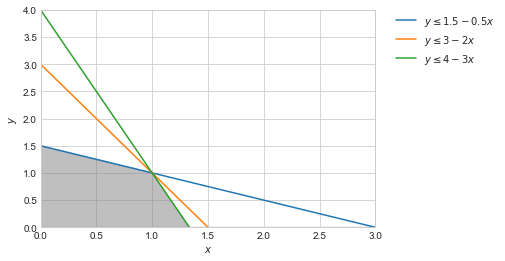

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Represent x2 as y for the following:
# Construct lines
# x >= 0
x = np.linspace(0, 20, 2000)
# y <= 1.5-0.5x
y1 = 1.5-0.5*x
# y <= 3-2x
y2 = 3-2*x
# y <= 4-3x
y3 = 4-3*x


# Make plot
plt.plot(x, y1, label=r'$y\leq1.5-0.5x$')
plt.plot(x, y2, label=r'$y\leq3-2x$')
plt.plot(x, y3, label=r'$y\leq4-3x$')
plt.xlim((0, 3))
plt.ylim((0, 4))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(np.minimum(y1,y2),y3)
plt.fill_between(x, y5, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Basic solutions:
- (0 , 3)
- (0 , 1.5)
- (3 , 0)
- (4 , 0)
- (1 , 1)
- (0 , 1.333)
- (1.5 , 0)
- (0 , 0)

Basic feasible solutions:
- (1 , 1)
- (0 , 1.333)
- (1.5 , 0)
- (0 , 0)

<h1> Problem 4 </h1>

<img src="https://imgur.com/ulPdtip.png">


<h2>Solution</h2>

$x_1 + x_2 + 0x_3 + 2x_4 + x_5 + x_6 + x_7 = 2$

$0x_1 + 2x_2 + 2x_3 + 0x_4 + 0x_5 + -2x_6 + 1x_7 = 2$

$1x_1 + 2x_2 + 1x_3 + 5x_4 + 4x_5 + 3x_6 + 3x_7 = 6$

$x_n \geq 0 \forall n \in {1,2,3,4,5,6,7}$



a) $x_1 = 1 , x_2 = 1 , x_3 = 0 , x_4 = 0 , x_5 = 0 , x_6 = 0 , x_7 = 0$

- $1(1) + 2(1) \neq 6$
- Basic, not feasible (two constraints met, third constraint not met)

b) $x_1 = 2 , x_2 = -1 , x_3 = 2 , x_4 = 0 , x_5 = 0 , x_6 = 0 , x_7 = 0$

- $1(2) + 1(-1) + 0(2) \neq 2$
- $1(2) + 2(-1) + 1(2) \neq 6$
- Not basic, not feasible (only one constraint met, greater than equalities not met)

c) $x_1 = 1 , x_2 = 0 , x_3 = 1 , x_4 = 0 , x_5 = 1 , x_6 = 0 , x_7 = 0$

- Basic feasible solution (all equalities met, greater than constraint met for all x_n)

d) $x_1 = 0 , x_2 = 0 , x_3 = 1 , x_4 = 1 , x_5 = 0 , x_6 = 0 , x_7 = 0$

- Basic feasible solution (all equalities met, greater than constraint met for all x_n)

e) $x_1 = 0 , x_2 = 0.5 , x_3 = 0 , x_4 = 0 , x_5 = 0.5 , x_6 = 0 , x_7 = 1$

- Basic feasible solution (all equalities met, greater than constraint met for all x_n)


<h1> Problem 5 </h1>

<img src="https://imgur.com/L628C6v.png">



a) The rank of the matrix is 2.



$
\left(\begin{array}{cc} 
2 & 1 & 1 \\
4 & 3 & 3 \\
3 & 2 & 2 
\end{array}\right)
$
⇒
$
\left(\begin{array}{cc} 
1 & 0 & 0 \\
0 & 1 & 1 \\
0 & 0 & 0 
\end{array}\right)
$

b) The solution matrix can be expressed into the following condensed form$
\left(\begin{array}{ccc|c} 
2 & 1 & 1 & 5\\
4 & 3 & 3 & 9\\
3 & 2 & 2 & 7
\end{array}\right)
$⇒
$
\left(\begin{array}{ccc|c} 
1 & 0 & 0 & 3\\
0 & 1 & 1 & -1\\
0 & 0 & 0 & 0
\end{array}\right)
$
⇒
$
\left(\begin{array}{ccc|c} 
1 & 0 & 0 & 3\\
0 & 1 & 1 & -1\\
\end{array}\right)
$

c) Basic Solutions:

- x<sub>1</sub> = 3, x<sub>2</sub> = -1, x<sub>3</sub> free
- x<sub>1</sub> = 3, x<sub>3</sub> = -1, x<sub>2</sub> free

No basic feasible solutions where all X values are >= 0